<br />

<div style="text-align: center;">
<font size="8">DCTのpython実装</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">山口翔太</font>
</div>

<br />

# ブログを習いそのまま実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class DCT:
    def __init__(self,N):
        self.N = N    # データ数．
        # 1次元，2次元離散コサイン変換の基底ベクトルをあらかじめ作っておく
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N) ])
        
        # Nが大きいとメモリリークを起こすので注意
        # MNISTの28x28程度なら問題ない
        self.phi_2d = np.zeros((N,N,N,N))
        for i in range(N):
            for j in range(N):
                phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
                self.phi_2d[i,j] = phi_i*phi_j
        #print(self.phi_2d)
        
    def dct1(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)
    
    def idct1(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c ,axis=1)
    
    def dct2(self,data):
        """ 2次元離散コサイン変換を行う """
        return np.sum(self.phi_2d.reshape(N*N,N*N)*data.reshape(N*N),axis=1).reshape(N,N)
    
    def idct2(self,c):
        """ 2次元離散コサイン逆変換を行う """
        return np.sum((c.reshape(N,N,1)*self.phi_2d.reshape(N,N,N*N)).reshape(N*N,N*N),axis=0).reshape(N,N)
    
    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        # DCT-IV(試しに実装してみた)
        #return np.sqrt(2.0/N)*np.cos((np.pi*(k+0.5)/self.N)*(np.arange(self.N)+0.5))

# 1次元DCT

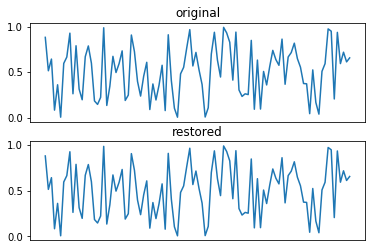

In [3]:
N = 100# データ数を100とします
dct_1d = DCT(N)# 離散コサイン変換を行うクラスを作成

x = np.random.random_sample(N)# N個の乱数データを作成
c = dct_1d.dct1(x)# 離散コサイン変換を実行
y = dct_1d.idct1(c)# 離散コサイン逆変換を実行


# 元のデータ(x)と復元したデータ(y)をグラフにしてみる
plt.subplot(2,1,1)
plt.plot(x,label="original")
plt.title("original")
plt.xticks([])
plt.subplot(2,1,2)
#plt.imshow(y,cmap="Greys")
plt.plot(y,label="restored")
plt.title("restored")
plt.xticks([])
plt.show()

DCTの行列計算の通り、時間領域-周波数領域は可逆なので、遜色のない波形が得られた。

<div style="page-break-after:always"></div>

# 2次元DCT

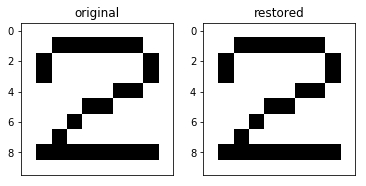

In [4]:
N = 10# データの次元は10x10とする
dct_2d = DCT(10)# 離散コサイン変換を行うクラスを作成
# サンプル画像を作る
img = np.array([
[0,0,0,0,0,0,0,0,0,0],
[0,0,1,1,1,1,1,1,0,0],
[0,1,0,0,0,0,0,0,1,0],
[0,1,0,0,0,0,0,0,1,0],
[0,0,0,0,0,0,1,1,0,0],
[0,0,0,0,1,1,0,0,0,0],
[0,0,0,1,0,0,0,0,0,0],
[0,0,1,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,0,0,0,0,0]
])

c = dct_2d.dct2(img)# 2次元離散コサイン変換
y = dct_2d.idct2(c)# 2次元離散コサイン逆変換

# 元の画像と復元したものを表示
plt.subplot(1,2,1)
plt.imshow(img,cmap="Greys")
plt.title("original")
plt.xticks([])
plt.subplot(1,2,2)
plt.imshow(y,cmap="Greys")
plt.title("restored")
plt.xticks([])
plt.show()

1次元と同一の結果であり、周波数領域からの復元は遜色のない結果となっている。

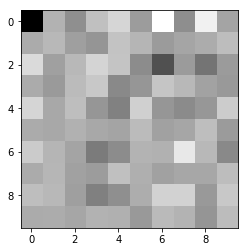

In [5]:
plt.imshow(c, cmap='Greys')

2次元DCT基底画像の強度をヒートマップのようにプロットした。左上が右下にかけて周波数が高くなっている。

<div style="page-break-before:always"></div>

# 周波数領域にフィルターをかけて、下の画像に戻す。

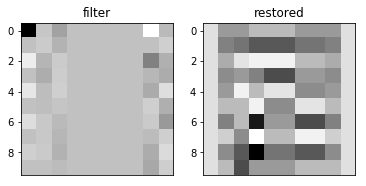

In [6]:
#filterの作る
c_x = 3
c_y = 0
mask = np.zeros((10,5))
s_mask = mask.shape

#filterを適用させる
filtered_c = c.copy()
filtered_c[c_y:c_y+s_mask[0], c_x:c_x+s_mask[1]] = mask

#周波数領域へfilterを適用させたものを逆変換する
y = dct_2d.idct2(filtered_c)

#プロット
plt.subplot(1,2,1)
plt.imshow(filtered_c, cmap='Greys')
plt.title("filter")
plt.xticks([])
plt.subplot(1,2,2)
plt.imshow(y,cmap="Greys")
plt.title("restored")
plt.xticks([])
plt.show()

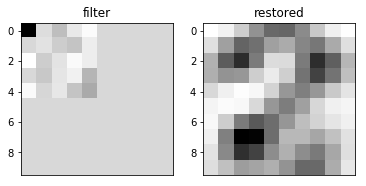

In [7]:
#filterを作る
filter_base = np.zeros(c.shape)
s_c = c[:5,:5].shape

#filterを適用させる
filter_base[0:0+s_c[0], 0:0+s_c[1]] = c[:5,:5]

#周波数領域へfilterを適用させたものを逆変換する
y = dct_2d.idct2(filter_base)

#プロット
plt.subplot(1,2,1)
plt.imshow(filter_base, cmap='Greys')
plt.title("filter")
plt.xticks([])
plt.subplot(1,2,2)
plt.imshow(y,cmap="Greys")
plt.title("restored")
plt.xticks([])
plt.show()

<div style="page-break-before:always"></div>

# lena.pngのDCT変換

In [8]:
from PIL import Image

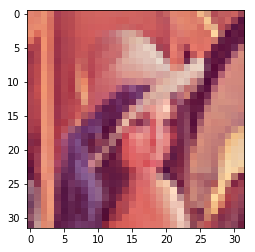

In [9]:
lena = Image.open(r'data/lena.png')

#画像サイズが大きいとメモリが溢れるので、適宜に縮小
lena_resize = lena.resize((32, 32), Image.LANCZOS)

#numpy配列へ変換する
lena_array = np.asarray(lena_resize)

#DCTクラスを画像に合わせて初期化
N = lena_array.shape[0]
dct_lena = DCT(N)

plt.imshow(lena_array)

## RGBをそれぞれ抜き出す

In [10]:
#１色を抜き出し"array[r]"形で1色化
lena_R2 = lena_array[:, :, 0]
lena_G2 = lena_array[:, :, 1]
lena_B2 = lena_array[:, :, 2]

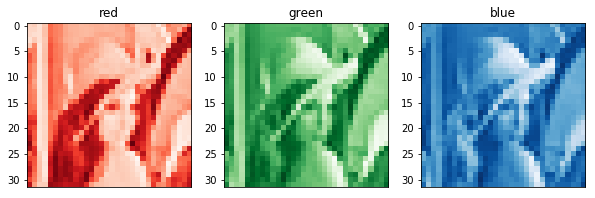

In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(1,3,1)
plt.imshow(lena_R2, cmap='Reds_r')
plt.title("red")
plt.xticks([])

plt.subplot(1,3,2)
plt.imshow(lena_G2, cmap="Greens_r")
plt.title("green")
plt.xticks([])

plt.subplot(1,3,3)
plt.imshow(lena_B2, cmap="Blues_r")
plt.title("blue")
plt.xticks([])

plt.show()

<div style="page-break-before:always"></div>

## それぞれをDCTし、周波数領域をプロットする 

Text(0.5,1,'restored')

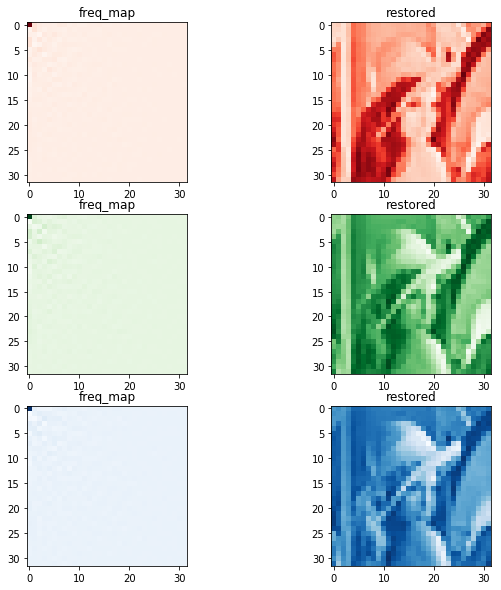

In [12]:
red_c = dct_lena.dct2(lena_R2)
blue_c = dct_lena.dct2(lena_B2)
green_c = dct_lena.dct2(lena_G2)

red_y = dct_lena.idct2(red_c)
blue_y = dct_lena.idct2(blue_c)
green_y = dct_lena.idct2(green_c)

plt.figure(figsize=(10, 10))

plt.subplot(3,2,1)
plt.imshow(red_c, cmap='Reds')
plt.title("freq_map")
plt.subplot(3,2,2)
plt.imshow(red_y,cmap="Reds_r")
plt.title("restored")

plt.subplot(3,2,3)
plt.imshow(green_c, cmap='Greens')
plt.title("freq_map")
plt.subplot(3,2,4)
plt.imshow(green_y,cmap="Greens_r")
plt.title("restored")

plt.subplot(3,2,5)
plt.imshow(blue_c, cmap='Blues')
plt.title("freq_map")
plt.subplot(3,2,6)
plt.imshow(blue_y,cmap="Blues_r")
plt.title("restored")

<div style="page-break-before:always"></div>

## それぞれの色にフィルターをかける

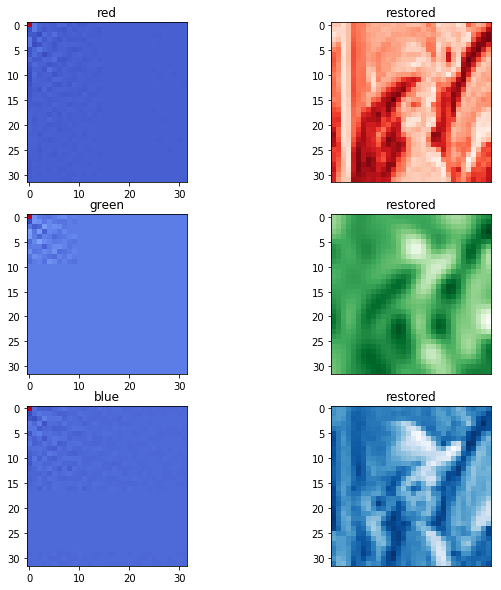

In [13]:
#red
#filterの作る
c_x = 15
c_y = 0
mask = np.zeros((32,10))
s_mask = mask.shape
#filterを適用させる
filtered_red_c = red_c.copy()
filtered_red_c[c_y:c_y+s_mask[0], c_x:c_x+s_mask[1]] = mask
#周波数領域へfilterを適用させたものを逆変換する
filtered_red_y = dct_lena.idct2(filtered_red_c)

#green
#filterを作る
filter_base = np.zeros(green_c.shape)
s_green_c = green_c[:10,:10].shape
#filterを適用させる
filter_base[0:0+s_green_c[0], 0:0+s_green_c[1]] = green_c[:10,:10]
#周波数領域へfilterを適用させたものを逆変換する
filtered_green_y = dct_lena.idct2(filter_base)

#blue
#filterの作る
c_x = 0
c_y = 17
mask = np.zeros((12,32))
s_mask = mask.shape
#filterを適用させる
filtered_blue_c = blue_c.copy()
filtered_blue_c[c_y:c_y+s_mask[0], c_x:c_x+s_mask[1]] = mask
#周波数領域へfilterを適用させたものを逆変換する
filtered_blue_y = dct_lena.idct2(filtered_blue_c)

#プロット
plt.figure(figsize=(10, 10))
plt.subplot(3,2,1)
plt.imshow(filtered_red_c, cmap='coolwarm')
plt.title("red")
plt.subplot(3,2,2)
plt.imshow(filtered_red_y,cmap="Reds_r")
plt.title("restored")
plt.xticks([])

plt.subplot(3,2,3)
plt.imshow(filter_base,cmap="coolwarm")
plt.title("green")
plt.subplot(3,2,4)
plt.imshow(filtered_green_y,cmap="Greens_r")
plt.title("restored")
plt.xticks([])

plt.subplot(3,2,5)
plt.imshow(filtered_blue_c,cmap="coolwarm")
plt.title("blue")
plt.subplot(3,2,6)
plt.imshow(filtered_blue_y,cmap="Blues_r")
plt.title("restored")
plt.xticks([])
plt.show()

<div style="page-break-before:always"></div>

## RGBをまとめ出力する

In [14]:
filtered_lena = lena_array.copy()
filtered_lena[:, :, 0], filtered_lena[:, :, 1], filtered_lena[:, :, 2] = filtered_red_y[:, :], filtered_green_y[:, :], filtered_blue_y[:, :]

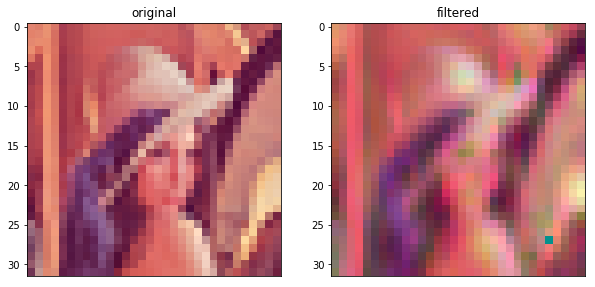

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(lena_array)
plt.title("original")
plt.xticks([])

plt.subplot(1,2,2)
plt.imshow(filtered_lena)
plt.title("filtered")
plt.xticks([])

plt.show()